# Fast AI DL1 Lesson 1 Part 1

Split into 2 parts to accomodate the limited RAM on Colab.

### To cross check if notebook is running on GPU backend

You should get **'/device:GPU:0'** if notebook is connected to GPU otherwise you will get **' '**

In [0]:
# this resets the state of the machine (e.g. if you want to re-install from scratch  
# or reset memory usage in this instance)
# wait a minute after running it and then reload the page
#!kill -9 -1

In [2]:
# require GPU before doing anything else
import tensorflow as tf
dev = tf.test.gpu_device_name()
if dev == '':
  raise Exception('No GPU!')
else :
  print(dev)

#!nvidia-smi --gpu-reset --id=0
!df -h

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
import gc

def print_proc_size():
  process = psutil.Process(os.getpid())
  print("proc size:" + humanize.naturalsize( process.memory_info().rss) )

# process size
def print_mem_free():
  print("available: " + humanize.naturalsize( psutil.virtual_memory().available ) )

def printm():
  # clean up the memory
  gc.collect()

  GPUs = GPU.getGPUs()
  # XXX: only one GPU on Colab and it's not guaranteed
  gpu = GPUs[0]
  
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print('GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util: {2:3.0f}% | Total: {3:.0f}MB'.format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()



  Running setup.py bdist_wheel for humanize ... - \ done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.0 GB  | Proc size: 987.6 MB
GPU RAM Free: 564MB | Used: 10875MB | Util:  95% | Total: 11439MB


In [3]:
!pip install scipy==1.1.0

    100% |████████████████████████████████| 31.2MB 1.3MB/s 
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


##Additional Setup for Google Colab

###Installing Pytorch

In [4]:
#!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision

    30% |█████████▉                      | 122.5MB 16.7MB/s eta 0:00:17

    100% |████████████████████████████████| 397.4MB 77.6MB/s 
    100% |████████████████████████████████| 61kB 3.3MB/s 
    100% |████████████████████████████████| 2.0MB 9.6MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


###Installing fastai

In [5]:
# fix Failed to display Jupyter Widget of type HBox (but still shows warning: Widget Javascript not detected...)
!pip install ipywidgets==6.0.0

#!pip uninstall -y fastai
!pip install fastai
#!pip install git+https://github.com/stas00/fastai
#!pip install https://github.com/fastai/fastai/archive/master.zip 
#!pip install git+https://github.com/jfpettit/fastai

    100% |████████████████████████████████| 51kB 3.8MB/s 
    100% |████████████████████████████████| 1.1MB 10.4MB/s 
    100% |████████████████████████████████| 430kB 7.0MB/s 
    100% |████████████████████████████████| 1.3MB 10.3MB/s 
    100% |████████████████████████████████| 1.5MB 14.7MB/s 


    100% |████████████████████████████████| 174kB 14.1MB/s 
    100% |████████████████████████████████| 20.9MB 1.7MB/s 
    100% |████████████████████████████████| 3.4MB 8.6MB/s 


    100% |████████████████████████████████| 112kB 18.3MB/s 
    100% |████████████████████████████████| 51kB 19.3MB/s 
    100% |████████████████████████████████| 51kB 16.3MB/s 
    100% |████████████████████████████████| 4.2MB 9.1MB/s 
    100% |████████████████████████████████| 61kB 14.6MB/s 
    100% |████████████████████████████████| 552kB 21.3MB/s 
    100% |████████████████████████████████| 13.7MB 3.1MB/s 
    100% |████████████████████████████████| 92kB 22.2MB/s 
    100% |████████████████████████████████| 471kB 8.3MB/s 


    100% |████████████████████████████████| 5.7MB 7.9MB/s 
    100% |████████████████████████████████| 860kB 21.1MB/s 
    100% |████████████████████████████████| 81kB 13.5MB/s 
    100% |████████████████████████████████| 71kB 17.5MB/s 
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 102kB 18.5MB/s 
    100% |████████████████████████████████| 61kB 15.9MB/s 
    100% |████████████████████████████████| 81kB 15.8MB/s 


  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /content/.cache/pip/wheels/98/2b/88/fe4cfe5bfa9cfea91cdfd2fe205f88746bf103f7b2994dffba
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /content/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in direct

 done
  Stored in directory: /content/.cache/pip/wheels/65/c1/0f/b90b6d7032c79ee40181fdadb72b2ef9a186f02269d6c52f02
  Running setup.py bdist_wheel for cliff ... - \ done
  Stored in directory: /content/.cache/pip/wheels/50/00/6d/d4aeb5ccdd47dd76800592b26f943e4959bc705b2d4e6e54e1
  Running setup.py bdist_wheel for configparser ... - done
  Stored in directory: /content/.cache/pip/wheels/a3/61/79/424ef897a2f3b14684a7de5d89e8600b460b89663e6ce9d17c
  Running setup.py bdist_wheel for PrettyTable ... - done
  Stored in directory: /content/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Running setup.py bdist_wheel for pyperclip ... - done
  Stored in directory: /content/.cache/pip/wheels/a7/68/ef/ab1ef01625334f10a979e9fe5ef79e1c4fd4cdf4b710a0067b
Successfully built fastai bcolz feather-format kaggle-cli pandas-summary torchtext jupyter-latex-envs cliff configparser PrettyTable pyperclip
kaggle-cli 0.12.13 has requirement lxml<4.1,>=4.0.0, but you'l

###Installing libSM

The import of fastai is will throw an error that this library is missing. So, Installing the same.

In [6]:
!apt install -y libsm6 libxext6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


### Workaround for an issue with PIL


Please refer this [link](http://forums.fast.ai/t/attributeerror-module-pil-image-has-no-attribute-register-extensions/10689/18) for information related to this issue and workaround.



In [0]:
# Pil workaround (image plotting) 

# workaround #1
#!pip install Pillow==4.0.0
#!pip install PIL
#!pip install image
#import PIL.image
#!pip install pillow


# workaround #2
from PIL import Image
def register_extension(id, extension): Image.EXTENSION[extension.lower()] = id.upper()
Image.register_extension = register_extension
def register_extensions(id, extensions): 
  for extension in extensions: register_extension(id, extension)
Image.register_extensions = register_extensions

# workaround #3

#def register_extension(id, extension): PIL.Image.EXTENSION[extension.lower()] = id.upper()
#PIL.Image.register_extension = register_extension
#def register_extensions(id, extensions): 
#  for extension in extensions: register_extension(id, extension)
#PIL.Image.register_extensions = register_extensions


###Downloading the dataset

In [8]:
mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip -q dogscats.zip -d data/

--2018-05-08 07:14:44--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip         79%[==============>     ] 653.27M  12.7MB/s    eta 13s    

dogscats.zip        100%[===================>] 817.50M  13.7MB/s    in 63s     

2018-05-08 07:15:48 (12.9 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



## Image classification with Convolutional Neural Networks

Welcome to the first week of the second deep learning certificate! We're going to use convolutional neural networks (CNNs) to allow our computer to see - something that is only possible thanks to deep learning.

## Introduction to our first task: 'Dogs vs Cats'

We're going to try to create a model to enter the Dogs vs Cats competition at Kaggle. There are 25,000 labelled dog and cat photos available for training, and 12,500 in the test set that we have to try to label for this competition. According to the Kaggle web-site, when this competition was launched (end of 2013): "State of the art: The current literature suggests machine classifiers can score above 80% accuracy on this task". So if we can beat 80%, then we will be at the cutting edge as of 2013!

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [12]:
PATH = "data/dogscats/"
printm()

Gen RAM Free: 11.9 GB  | Proc size: 1.1 GB
GPU RAM Free: 564MB | Used: 10875MB | Util:  95% | Total: 11439MB


### Extra steps if NOT using Crestle or our scripts

The dataset is available at http://files.fast.ai/data/dogscats.zip. You can download it directly on your server by running the following line in your terminal. `wget http://files.fast.ai/data/dogscats.zip`. You should put the data in a subdirectory of this notebook's directory, called `data/`.

### Extra steps if using Crestle

Crestle has the datasets required for fast.ai in /datasets, so we'll create symlinks to the data we want for this competition. (NB: we can't write to /datasets, but we need a place to store temporary files, so we create our own writable directory to put the symlinks in, and we also take advantage of Crestle's `/cache/` faster temporary storage space.)

To run these commands (**which you should only do if using Crestle**) remove the `#` characters from the start of each line.

In [0]:
# os.makedirs('data/dogscats/models', exist_ok=True)

# !ln -s /datasets/fast.ai/dogscats/train {PATH}
# !ln -s /datasets/fast.ai/dogscats/test {PATH}
# !ln -s /datasets/fast.ai/dogscats/valid {PATH}

# os.makedirs('/cache/tmp', exist_ok=True)
# !ln -fs /cache/tmp {PATH}

In [0]:
# os.makedirs('/cache/tmp', exist_ok=True)
# !ln -fs /cache/tmp {PATH}

## First look at cat pictures

Our library will assume that you have *train* and *valid* directories. It also assumes that each dir will have subdirs for each class you wish to recognize (in this case, 'cats' and 'dogs').

In [15]:
!ls {PATH}

models	sample	test1  train  valid


In [16]:
!ls {PATH}valid
!ls -1 {PATH}valid/cats | wc -l
!ls -1 {PATH}valid/cats | wc -l

cats  dogs
1000
1000


In [17]:
files = !ls {PATH}valid/cats | head
files

['cat.10016.jpg',
 'cat.1001.jpg',
 'cat.10026.jpg',
 'cat.10048.jpg',
 'cat.10050.jpg',
 'cat.10064.jpg',
 'cat.10071.jpg',
 'cat.10091.jpg',
 'cat.10103.jpg',
 'cat.10104.jpg']

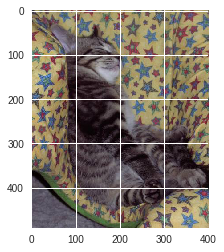

In [18]:
img = plt.imread(f'{PATH}valid/cats/{files[2]}')
plt.imshow(img);

Here is how the raw data looks like

In [19]:
img.shape

(491, 400, 3)

In [20]:
img[:4,:4]

array([[[ 79,  74, 104],
        [ 66,  62,  89],
        [ 52,  49,  68],
        [ 46,  43,  54]],

       [[ 76,  72,  99],
        [ 72,  68,  93],
        [ 68,  65,  84],
        [ 64,  61,  72]],

       [[ 61,  59,  81],
        [ 70,  67,  86],
        [ 80,  78,  92],
        [ 82,  80,  91]],

       [[ 60,  59,  73],
        [ 70,  69,  83],
        [ 83,  81,  94],
        [ 86,  85,  93]]], dtype=uint8)

## Our first model: quick start

We're going to use a <b>pre-trained</b> model, that is, a model created by some one else to solve a different problem. Instead of building a model from scratch to solve a similar problem, we'll use a model trained on ImageNet (1.2 million images and 1000 classes) as a starting point. The model is a Convolutional Neural Network (CNN), a type of Neural Network that builds state-of-the-art models for computer vision. We'll be learning all about CNNs during this course.

We will be using the <b>resnet34</b> model. resnet34 is a version of the model that won the 2015 ImageNet competition. Here is more info on [resnet models](https://github.com/KaimingHe/deep-residual-networks). We'll be studying them in depth later, but for now we'll focus on using them effectively.

Here's how to train and evalulate a *dogs vs cats* model in 3 lines of code, and under 20 seconds:

In [0]:
# Uncomment the below if you need to reset your precomputed activations
#!rm -rf {PATH}tmp


In [21]:
arch=resnet34
#sz=60
sz=28
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz), bs=8)
printm()
learn = ConvLearner.pretrained(arch, data, precompute=True)
printm()
learn.fit(0.01, 3)
printm()

Gen RAM Free: 11.9 GB  | Proc size: 1.1 GB
GPU RAM Free: 564MB | Used: 10875MB | Util:  95% | Total: 11439MB


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 52040167.31it/s]


  2%|▏         | 52/2875 [00:10<09:09,  5.14it/s]

/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


100%|██████████| 250/250 [00:08<00:00, 28.94it/s]
Gen RAM Free: 10.5 GB  | Proc size: 2.7 GB
GPU RAM Free: 287MB | Used: 11152MB | Util:  97% | Total: 11439MB


Widget Javascript not detected.  It may not be installed or enabled properly.


 12%|█▏        | 333/2875 [00:10<01:17, 32.82it/s, loss=1.28]

/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


[0.      0.57968 0.51193 0.753  ]


[1.      0.54685 0.51538 0.74   ]


[2.      0.54362 0.50384 0.761  ]

Gen RAM Free: 10.5 GB  | Proc size: 2.7 GB
GPU RAM Free: 269MB | Used: 11170MB | Util:  98% | Total: 11439MB


How good is this model? Well, as we mentioned, prior to this competition, the state of the art was 80% accuracy. But the competition resulted in a huge jump to 98.9% accuracy, with the author of a popular deep learning library winning the competition. Extraordinarily, less than 4 years later, we can now beat that result in seconds! Even last year in this same course, our initial model had 98.3% accuracy, which is nearly double the error we're getting just a year later, and that took around 10 minutes to compute.

## Analyzing results: looking at pictures

In [22]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

In [23]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [24]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [25]:
log_preds[:10]

array([[-0.15737, -1.92683],
       [-0.35765, -1.2017 ],
       [-0.50797, -0.92059],
       [-0.40691, -1.09573],
       [-0.59727, -0.7992 ],
       [-0.0858 , -2.49834],
       [-0.03824, -3.28283],
       [-0.75313, -0.63656],
       [-1.0416 , -0.43524],
       [-0.35765, -1.2017 ]], dtype=float32)

In [26]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
preds



array([0, 0, 0, ..., 0, 1, 1])

In [27]:
probs = np.exp(log_preds[:,1])        # pr(dog)
probs

array([0.14561, 0.30068, 0.39829, ..., 0.36026, 0.64623, 0.58559], dtype=float32)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


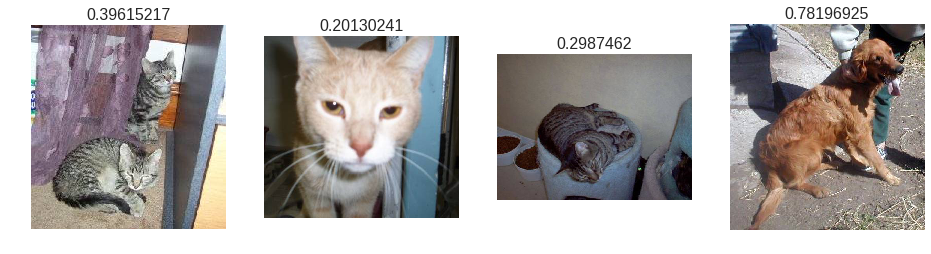

In [32]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


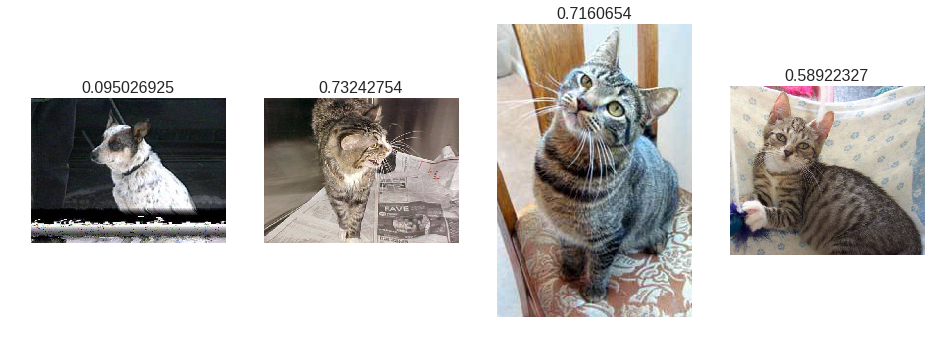

In [33]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

Most correct cats


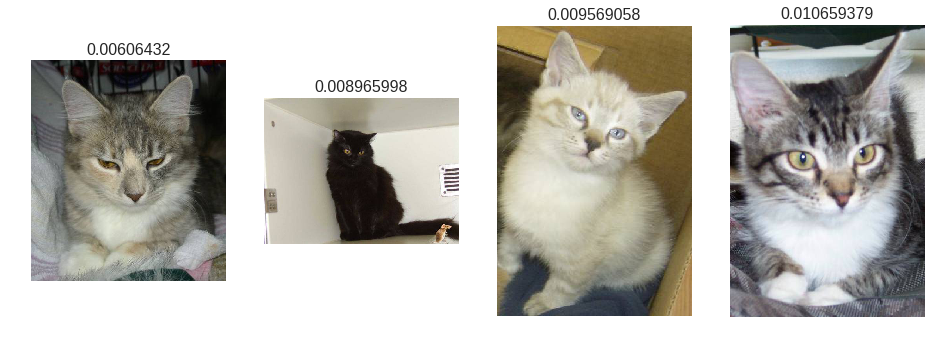

In [35]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


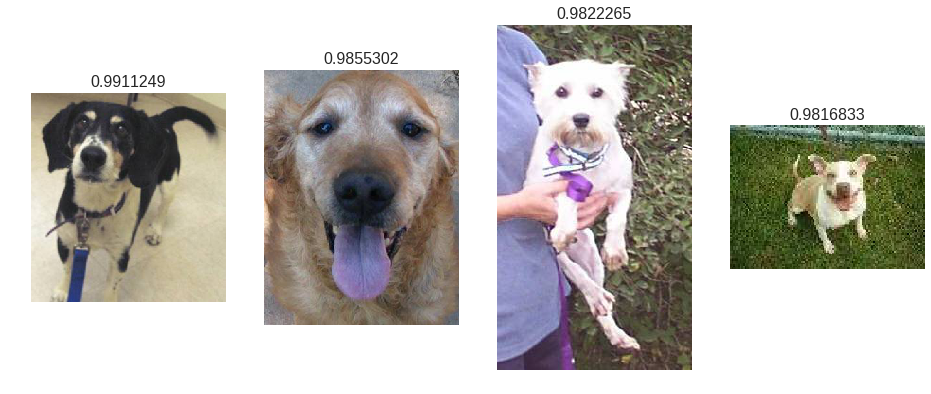

In [36]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


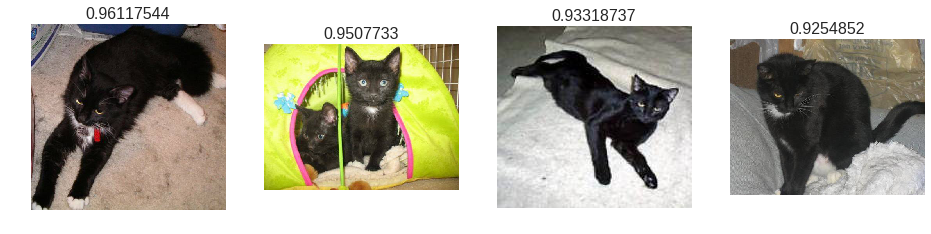

In [37]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


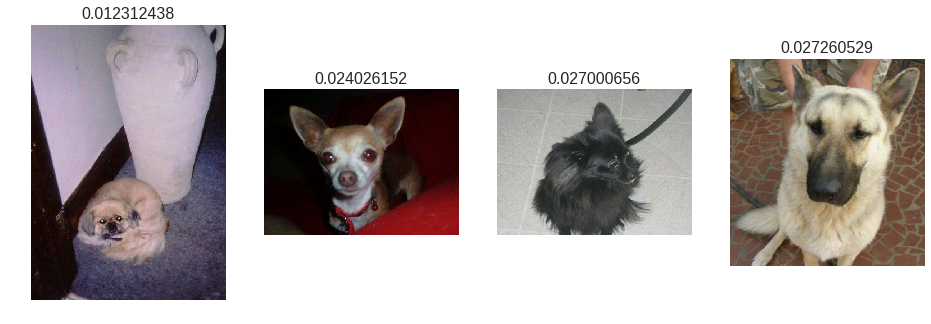

In [38]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


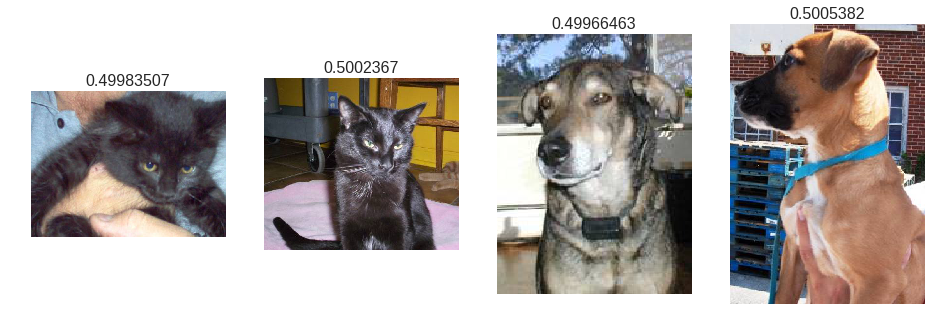

In [39]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

## Choosing a learning rate

The *learning rate* determines how quickly or how slowly you want to update the *weights* (or *parameters*). Learning rate is one of the most difficult parameters to set, because it significantly affect model performance.

The method `learn.lr_find()` helps you find an optimal learning rate. It uses the technique developed in the 2015 paper [Cyclical Learning Rates for Training Neural Networks](http://arxiv.org/abs/1506.01186), where we simply keep increasing the learning rate from a very small value, until the loss starts decreasing. We can plot the learning rate across batches to see what this looks like.

We first create a new learner, since we want to know how to set the learning rate for a new (untrained) model.

In [40]:
printm()
learn = ConvLearner.pretrained(arch, data, precompute=True)

Gen RAM Free: 10.4 GB  | Proc size: 2.7 GB
GPU RAM Free: 269MB | Used: 11170MB | Util:  98% | Total: 11439MB


In [41]:
lrf=learn.lr_find()

Widget Javascript not detected.  It may not be installed or enabled properly.


 12%|█▏        | 347/2875 [00:10<01:13, 34.17it/s, loss=0.858]

/usr/local/lib/python3.6/dist-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)


 67%|██████▋   | 1915/2875 [00:24<00:12, 76.92it/s, loss=2.77]

Our `learn` object contains an attribute `sched` that contains our learning rate scheduler, and has some convenient plotting functionality including this one:

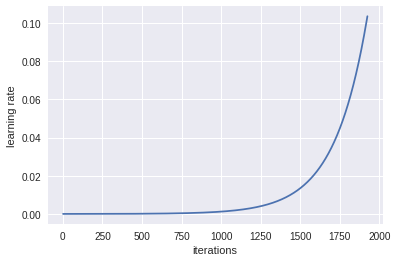

In [42]:
learn.sched.plot_lr()

Note that in the previous plot *iteration* is one iteration (or *minibatch*) of SGD. In one epoch there are 
(num_train_samples/num_iterations) of SGD.

We can see the plot of loss versus learning rate to see where our loss stops decreasing:

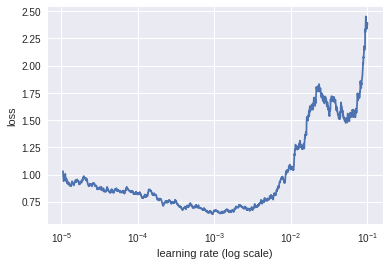

In [43]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we training the model, so you may want to re-run this function from time to time.

In [44]:
printm()


Gen RAM Free: 10.3 GB  | Proc size: 2.7 GB
GPU RAM Free: 187MB | Used: 11252MB | Util:  98% | Total: 11439MB
